In [1]:
# Install required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)


Saving cleaned combined housing data.csv to cleaned combined housing data.csv


In [3]:
print(" Dataset Shape ")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n Data Types ")
print(df.dtypes.value_counts())

print("\n Missing Values ")
print(df.isnull().sum().sort_values(ascending=False).head(10))

 Dataset Shape 
Rows: 2919, Columns: 77

 Data Types 
object     36
int64      28
float64    13
Name: count, dtype: int64

 Missing Values 
MSSubClass      0
MSZoning        0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
dtype: int64


In [4]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns


In [6]:
# Fill missing values for specific columns if they exist
for col, fill_value in [('PoolQC', 'None'), ('MiscFeature', 'None'), ('Alley', 'No alley access')]:
    if col in df.columns:
        df[col] = df[col].fillna(fill_value)

# Important derived features
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

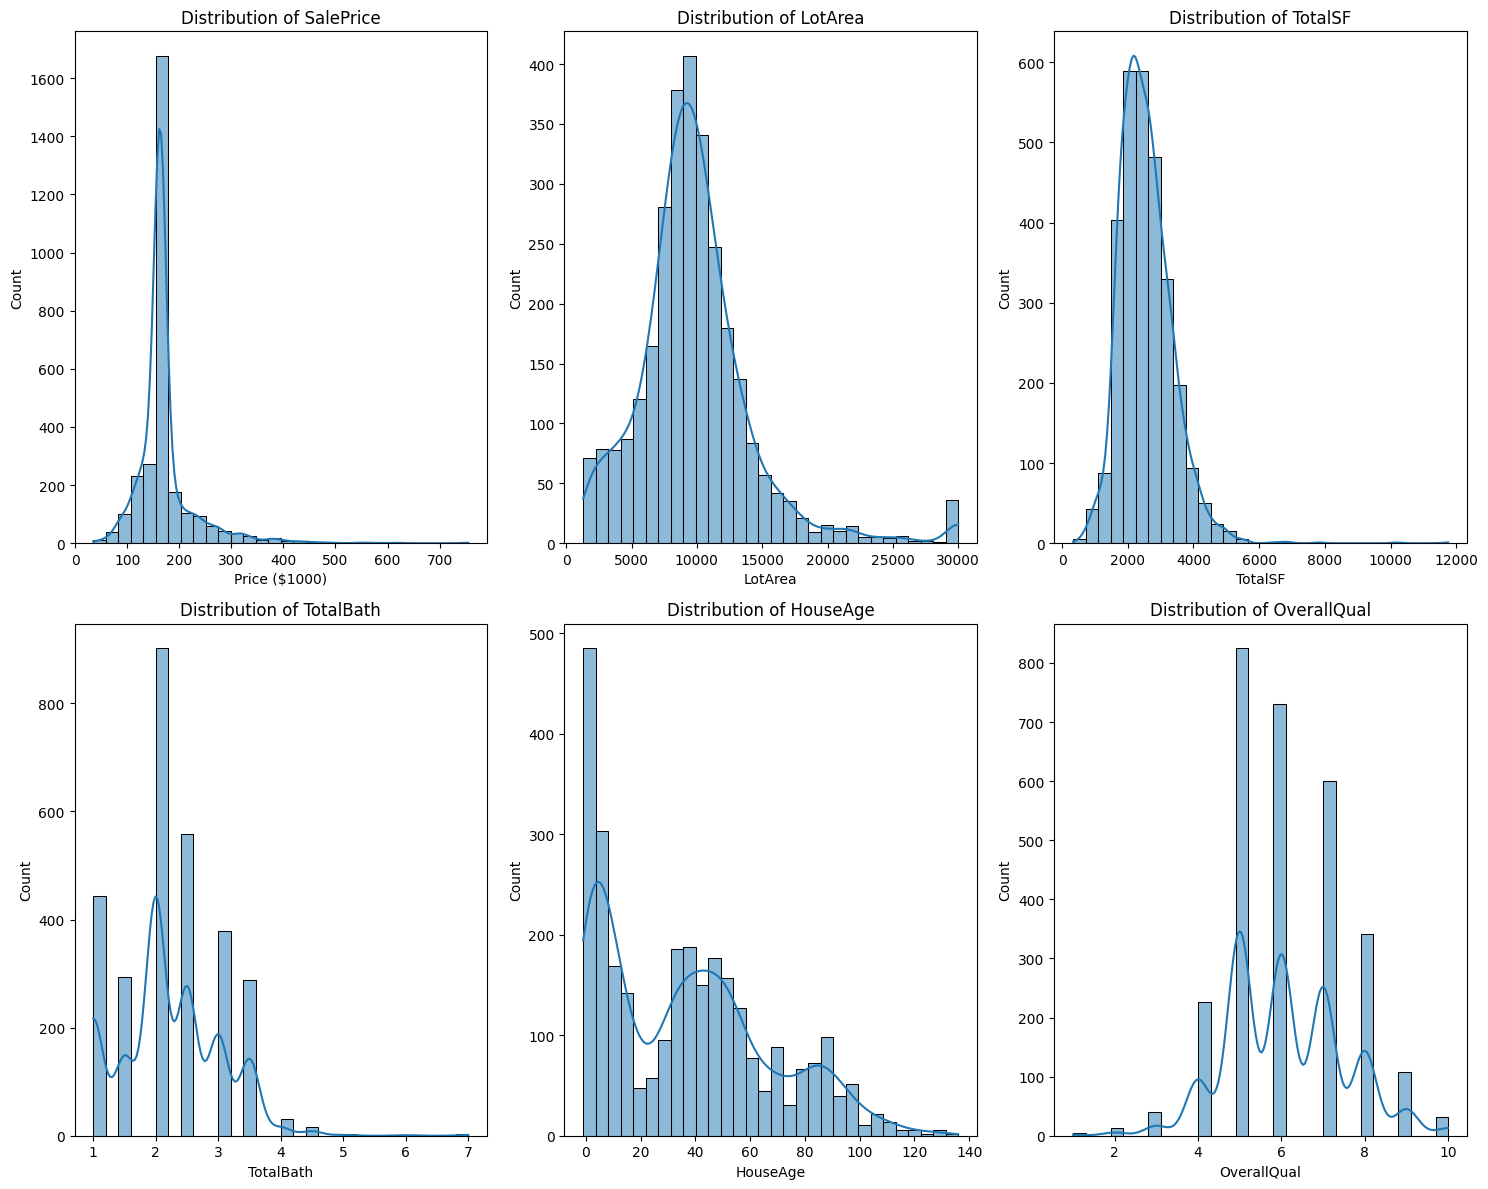

In [7]:
plt.figure(figsize=(15,12))

# Numerical features
num_features = ['SalePrice','LotArea','TotalSF','TotalBath','HouseAge','OverallQual']
for i, col in enumerate(num_features, 1):
    plt.subplot(2,3,i)
    if col == 'SalePrice':
        sns.histplot(df[col]/1000, bins=30, kde=True)
        plt.xlabel('Price ($1000)')
    else:
        sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


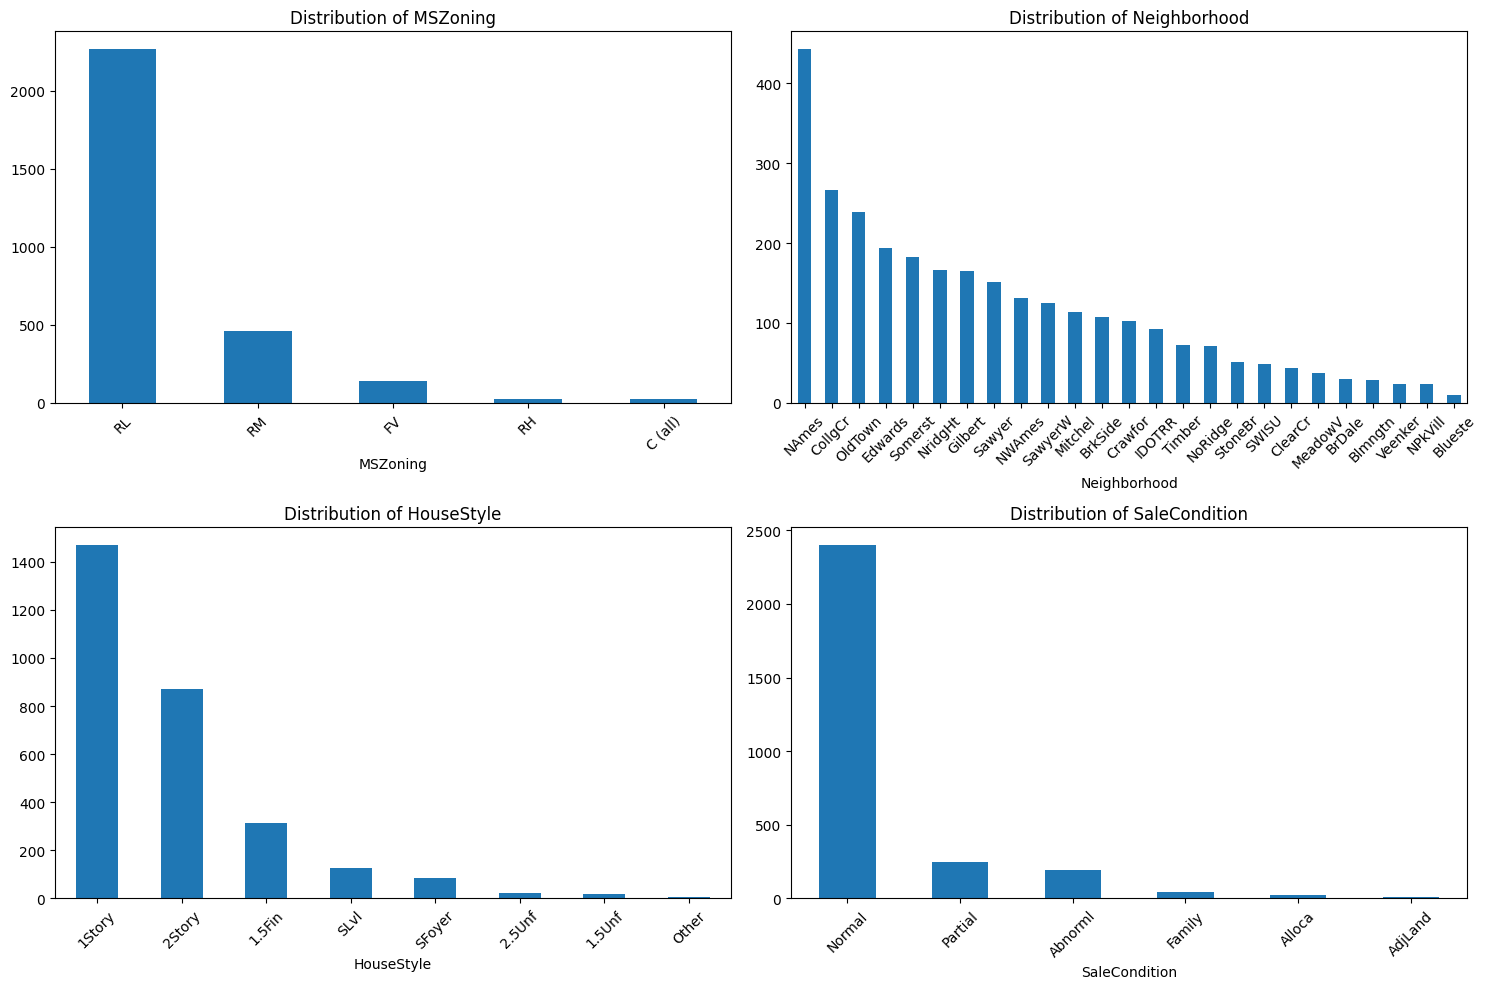

In [8]:
# Categorical features
cat_features = ['MSZoning','Neighborhood','HouseStyle','SaleCondition']
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_features, 1):
    plt.subplot(2,2,i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

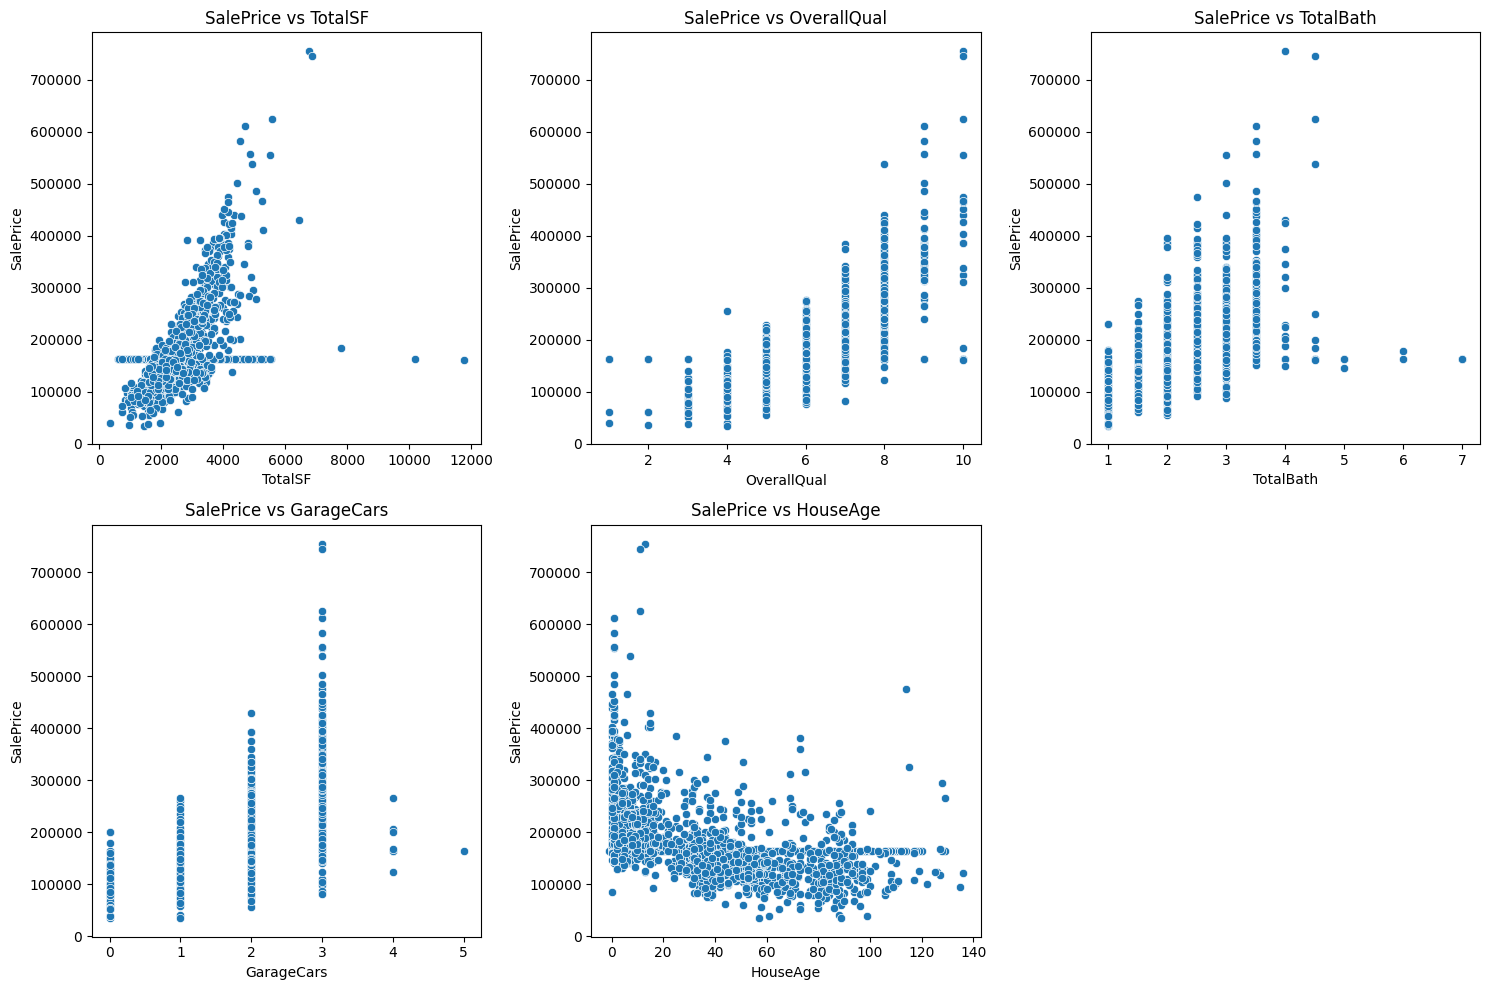

In [9]:
# Price vs Numerical Features
plt.figure(figsize=(15,10))
for i, col in enumerate(['TotalSF','OverallQual','TotalBath','GarageCars','HouseAge'], 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=col, y='SalePrice', data=df)
    plt.title(f'SalePrice vs {col}')
plt.tight_layout()
plt.show()

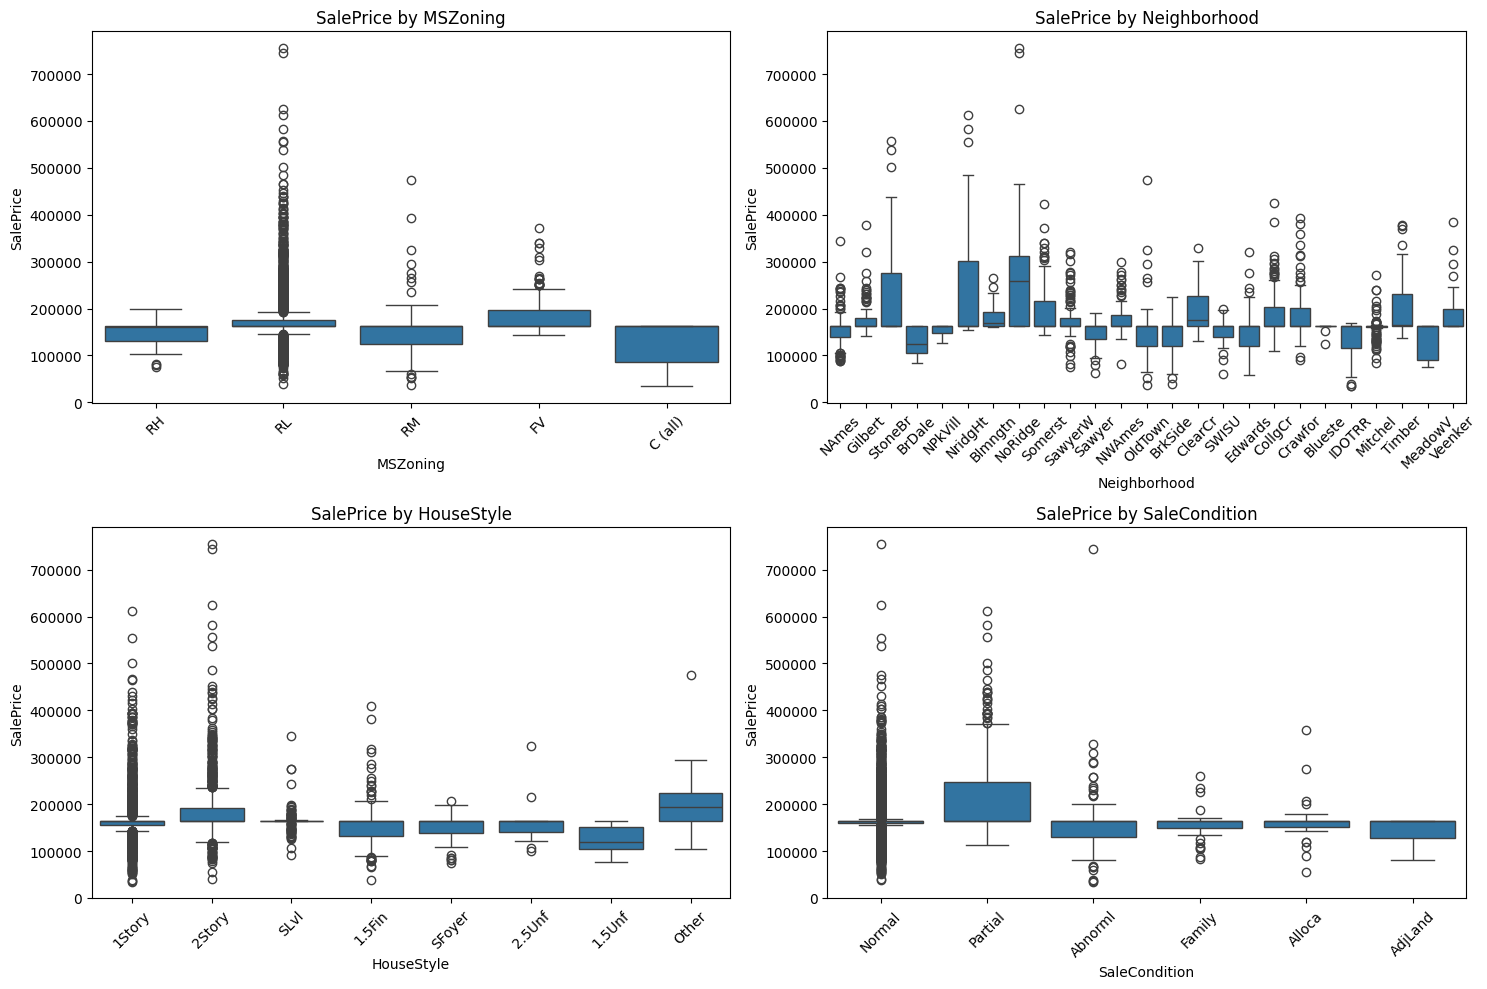

In [10]:
# Price vs Categorical Features
plt.figure(figsize=(15,10))
for i, col in enumerate(['MSZoning','Neighborhood','HouseStyle','SaleCondition'], 1):
    plt.subplot(2,2,i)
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

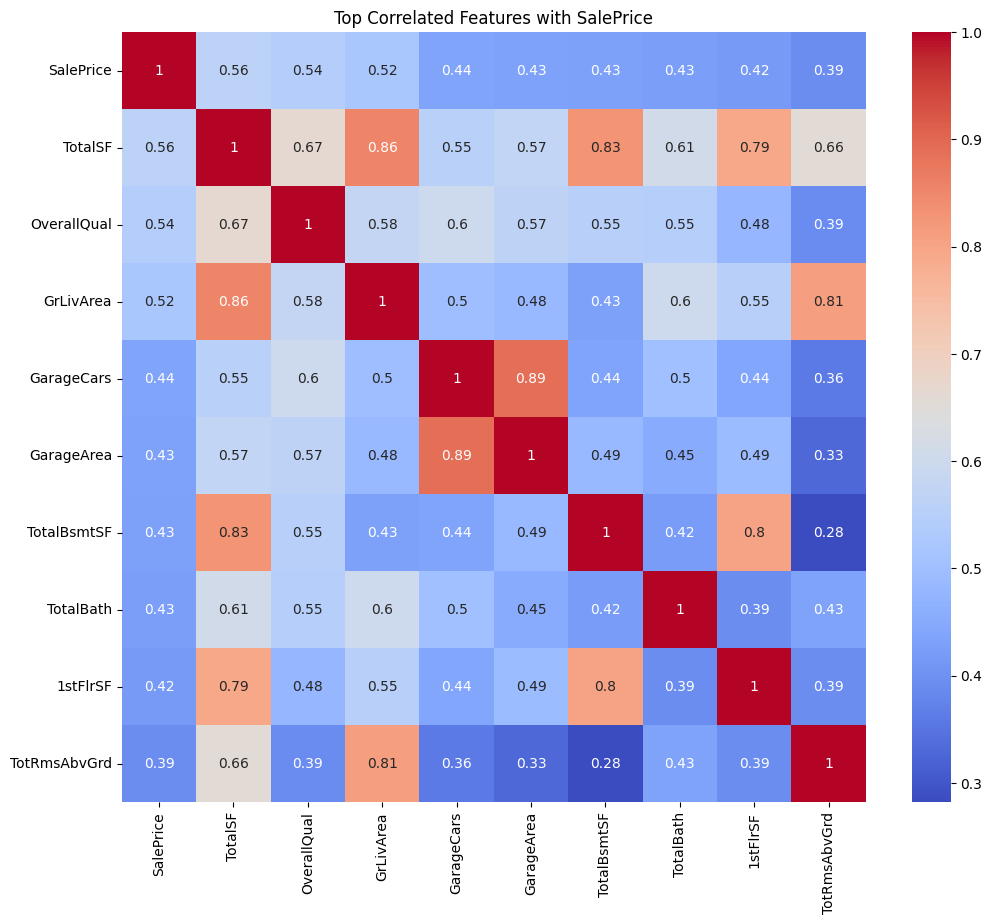

In [11]:
corr_matrix = df[num_cols].corr()
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,10))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()


In [ ]:
#  Save Processed Data
df.to_csv('cleaned_ames_housing.csv', index=False)
files.download('cleaned_ames_housing.csv')